In [1]:
# 유방암데이터 분류
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [3]:
cancer.data[:1]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

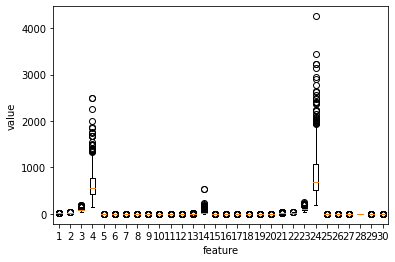

In [5]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [6]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [10]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [11]:
x = cancer.data
y = cancer.target

In [12]:
# 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [16]:
np.unique( y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [29]:
# 로지스틱 회귀를 구현한 뉴런을 제작  w , b
class LogisticNeuron:
    def __init__(self):
        self.w = None  # 가중치 초기화
        self.b = None  # 절편을 초기화
    def forpass(self, x):  # 정방향
        z = np.sum(x*self.w) + self.b # 직선 방정식을 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x*err # 가중치에 대한 그레디언트
        b_grad = 1*err # 절편에 대한 그레디언트
        return w_grad, b_grad
    
    def activation(self, z):
        z = np.clip(z, -100, None) # np.exp() 계산을 안전하게
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):  
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):  # 에포크만큼 반복학습
            for x_i, y_i in zip(x,y): # 모든 셈플에 대해 반복
                z = self.forpass(x_i)  # 정방향 계산
                a = self.activation(z) # 활성화 함수를 적용
                err = -(y_i-a)         # 오차를 계산
                w_grad, b_grad =  self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad      # 가중치 업데이트
                self.b -= b_grad      # 절편 업데이트
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산
        a = self.activation(np.array(z))     # 활성화 함수 적용
        return a > 0.5

In [18]:
a = np.array([1,2,3])
b = np.array([3,4,5])

In [19]:
a+b

array([4, 6, 8])

In [20]:
a*b

array([ 3,  8, 15])

In [21]:
np.sum(a*b)

26

In [23]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [24]:
np.full((2,3),7 )

array([[7, 7, 7],
       [7, 7, 7]])

In [28]:
np.c_[ np.zeros((2,3)), np.ones((2,3)) ]

array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])

In [31]:
neuron =  LogisticNeuron()
neuron.fit(x_train, y_train)

In [33]:
np.mean( neuron.predict(x_test) == y_test )

0.8245614035087719

In [35]:
np.random.permutation(np.arange(100))

array([95, 59, 53, 49, 11,  4,  5, 72, 83, 71, 98, 64, 69, 74, 43, 35, 86,
       25, 58, 85, 80, 15,  1, 27, 65, 28, 81, 67, 63, 41, 26, 88, 54, 38,
       18, 10, 20, 89, 96,  0, 30,  3, 68, 91, 97, 42, 79,  7, 55, 76, 70,
       12, 40, 62, 32, 87,  6, 99, 52, 34, 51, 77, 50,  8, 44, 92, 46, 19,
       37, 60, 57,  2, 29, 47, 14, 13, 78, 90, 75, 17, 56, 84, 24, 48, 94,
       21, 33, 66, 73, 61, 23, 39, 31, 22, 36, 82, 45,  9, 16, 93])

In [39]:
# 단층 신경망.... 퍼셉트론
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    def forpass(self, x):  # 직선의 방정식
        z = np.sum(x * self.w) + self.b
        return z
    def backprop(self, x, err):
        w_grad = x*err # 가중치에 대한 그레디언트
        b_grad = 1*err # 절편에 대한 그레디언트
        return w_grad, b_grad
    def activation(self, z):
        z = np.clip(z, -100, None) # np.exp() 계산을 안전하게
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
        return a
    def fit(self, x, y, epochs=100):  
        self.w = np.ones(x.shape[1])  # 가중치 초기화
        self.b = 0                    # 절편을 초기화
        for i in range(epochs):  # 에포크만큼 반복학습
            loss = 0
            # 인덱스 섞기
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])  # 정방향 계산
                a = self.activation(z) # 활성화 함수를 적용
                err = -(y[i]-a)         # 오차를 계산 
                w_grad, b_grad =  self.backprop(x[i], err)  # 역방향 계산
                self.w -= w_grad      # 가중치 업데이트
                self.b -= b_grad      # 절편 업데이트
                # 안전한 계산을 위해 클리핑한 후 손실을 누적
                a = np.clip(a, 1e-10, 1- 1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            #에포크마다 손실을 저장
            self.losses.append(loss/len(y))
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산        
        return np.array(z) > 0    # 스텝함수 적용
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [40]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9473684210526315

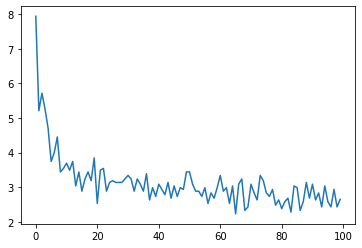

In [41]:
plt.plot(layer.losses)
plt.show()